In [19]:
import os
import csv
import cv2
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#from PIL import Image
#import hashlib
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import ensemble
%matplotlib inline 

In [20]:
features = np.loadtxt("features.csv", delimiter = ",", dtype = np.unicode_)

In [50]:
# subset out factors (features), malignancy labels, and rest of data
factors = features[0,1:]
labels = features[1:,1]
data = features[1:, 2:]

## MULTICLASS
# factors = features[0,1:]
# labels = features[1:,1:5]
# data = features[1:, 5:]
# print(labels[0:5,:])

print(data.shape[0])
print((sum(test_labels) + sum(train_labels))/ data.shape[0])
print(sum(test_labels) + sum(train_labels))

1199
0.5446205170975813
653


In [22]:
# Use random array to randomly add k rows to training set and total - k rows to testing set
k = 960
np.random.seed(0)

rand_arr = np.arange(data.shape[0])
np.random.shuffle(rand_arr)

train = data[rand_arr[0],:]
train_labels = labels[rand_arr[0]]
for i in range(1,k):
    train = np.vstack((train,data[rand_arr[i],:]))
    train_labels = np.append(train_labels,labels[rand_arr[i]])
    
test = data[rand_arr[k],:]
test_labels = labels[rand_arr[k]]
for i in range(k+1,data.shape[0]):
    test = np.vstack((test,data[rand_arr[i],:]))
    test_labels = np.append(test_labels,labels[rand_arr[i]])

In [23]:
## Change data types to float
train = train.astype(float)
train_labels = train_labels.astype(int)
test = test.astype(float)
test_labels = test_labels.astype(int)

In [38]:
### SVC
from sklearn import svm
clf = svm.SVC()
clf.fit(train, train_labels)
results = clf.predict(test)
print(clf.score(test, test_labels))
print(clf.score(train, train_labels))
cmat = confusion_matrix(test_labels, results)
print(cmat)
#print(metrics.classification_report(test_labels, results))
print('sensitivity:', (cmat[1,1] / (cmat[1,1] + cmat[1,0])))
print('specificity:', (cmat[0,0] / (cmat[0,0] + cmat[0,1])))
fpr, tpr, thresholds = metrics.roc_curve(test_labels, results)
print("auc: %f" % metrics.auc(fpr,tpr))

0.5564853556485355
0.996875
[[  1 104]
 [  2 132]]
sensitivity: 0.9850746268656716
specificity: 0.009523809523809525
auc: 0.497299


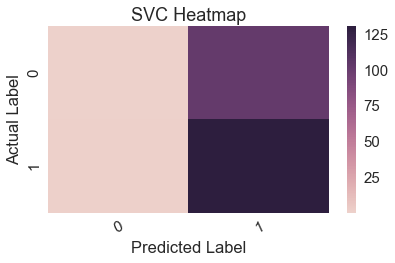

In [39]:
## SVC Heat map
sns.set(font_scale=1.5)
sns.set_style(style='white')
cmap = sns.cubehelix_palette(as_cmap=True)
ax = sns.heatmap(cmat, cmap=cmap)
ax.set(xlabel='Predicted Label', ylabel='Actual Label')
ax.set_title('SVC Heatmap')
plt.xticks(rotation=25)
plt.tight_layout()
plt.savefig('CM.png')

In [7]:
### LinearSVC
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(train, train_labels)
results = clf.predict(test)
print(clf.score(test, test_labels))
print(clf.score(train, train_labels))
cmat = confusion_matrix(test_labels, results)
print(cmat)
print('sensitivity:', (cmat[1,1] / (cmat[1,1] + cmat[1,0])))
print('specificity:', (cmat[0,0] / (cmat[0,0] + cmat[0,1])))
fpr, tpr, thresholds = metrics.roc_curve(test_labels, results)
print("auc: %f" % metrics.auc(fpr,tpr))

0.4393305439330544
0.459375
[[105   0]
 [134   0]]
sensitivity: 0.0
specificity: 1.0
auc: 0.500000


In [8]:
# ## MULTICLASS NAIVE BAYES
# from sklearn.naive_bayes import GaussianNB
# from sklearn.multiclass import OneVsRestClassifier

# print(train_labels.shape)

# clf = OneVsRestClassifier(GaussianNB())
# clf.fit(train, train_labels)
# results = clf.predict(test)
# # all_labels = MultiLabelBinarizer().inverse_transform(predicted)
# print(results)

# print(clf.score(test, test_labels))
# print(clf.score(train, train_labels))
# cmat = confusion_matrix(test_labels, results)
# print(cmat)
# print('sensitivity:', (cmat[1,1] / (cmat[1,1] + cmat[1,0])))
# print('specificity:', (cmat[0,0] / (cmat[0,0] + cmat[0,1])))
# # fpr, tpr, thresholds = metrics.roc_curve(test_labels, results)
# # print("auc: %f" % metrics.auc(fpr,tpr))

In [40]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(train, train_labels)
results = clf.predict(test)
print(clf.score(test, test_labels))
print(clf.score(train, train_labels))
cmat = confusion_matrix(test_labels, results)
print(cmat)
print('sensitivity:', (cmat[1,1] / (cmat[1,1] + cmat[1,0])))
print('specificity:', (cmat[0,0] / (cmat[0,0] + cmat[0,1])))
fpr, tpr, thresholds = metrics.roc_curve(test_labels, results)
print("auc: %f" % metrics.auc(fpr,tpr))

0.5564853556485355
0.5489583333333333
[[38 67]
 [39 95]]
sensitivity: 0.7089552238805971
specificity: 0.3619047619047619
auc: 0.535430


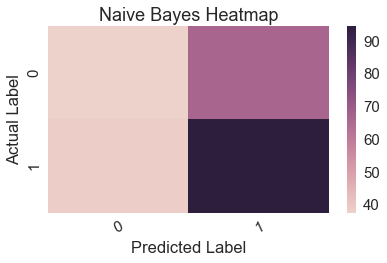

In [41]:
## NB Heat map
sns.set(font_scale=1.5)
sns.set_style(style='white')
cmap = sns.cubehelix_palette(as_cmap=True)
ax = sns.heatmap(cmat, cmap=cmap)
ax.set(xlabel='Predicted Label', ylabel='Actual Label')
ax.set_title('Naive Bayes Heatmap')
plt.xticks(rotation=25)
plt.tight_layout()
plt.savefig('CM.png')

In [ ]:
## Logistic Regression
clf = linear_model.LogisticRegression()
clf.fit(train, train_labels)
results = clf.predict(test)
print(clf.score(test, test_labels))
print(clf.score(train, train_labels))
cmat = confusion_matrix(test_labels, results)
print(cmat)
print('sensitivity:', (cmat[1,1] / (cmat[1,1] + cmat[1,0])))
print('specificity:', (cmat[0,0] / (cmat[0,0] + cmat[0,1])))
fpr, tpr, thresholds = metrics.roc_curve(test_labels, results)
print("auc: %f" % metrics.auc(fpr,tpr))

In [12]:
## Random Forest
clf = ensemble.RandomForestClassifier()
clf.fit(train, train_labels)
results = clf.predict(test)
print(clf.score(test, test_labels))
print(clf.score(train, train_labels))
cmat = confusion_matrix(test_labels, results)
print(cmat)
print('sensitivity:', (cmat[1,1] / (cmat[1,1] + cmat[1,0])))
print('specificity:', (cmat[0,0] / (cmat[0,0] + cmat[0,1])))
fpr, tpr, thresholds = metrics.roc_curve(test_labels, results)
print("auc: %f" % metrics.auc(fpr,tpr))

0.5146443514644351
0.98125
[[55 50]
 [66 68]]
sensitivity: 0.5074626865671642
specificity: 0.5238095238095238
auc: 0.515636


In [11]:
## Majority Classifier
print(sum(test_labels))
print(len(test_labels))
print(sum(test_labels) / len(test_labels))

134
239
0.5606694560669456


In [ ]:
cm = confusion_matrix(test_labels, results)
print(cm)

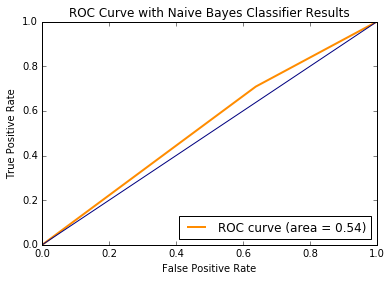

In [10]:
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw=2
plt.plot(fpr, tpr, color = 'darkorange', lw=lw, 
         label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color = 'navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Naive Bayes Classifier Results')
plt.legend(loc = 'lower right')
plt.show()